

<div class="alert alert-block alert-info">
    <img src="https://www.uerj.br/wp-content/uploads/2019/07/logo-70anos-site.svg" alt="Trulli" width="220" align="left">
    <center style="width: 80%;">
        <div> <b>Author:</b> Cleiton Magalhães Freitas</div>
        <div> <b>Department:</b> Electrical Engineering Department</div>
        <div> <b>University:</b> Rio de Janeiro State University</div>
        <div> <b>Email:</b> cleiton.freitas@uerj.br</div>
        <div> <b>Date:</b> 28/06/2020</div>
        <div style="display: table;">
            <div style="width: 17%; display: table-cell;">
                <a href="https://orcid.org/0000-0002-6300-0521">
                    <img  src="https://orcid.org/sites/default/files/images/orcid_24x24.png" width='22'/>
                </a>
            </div>
            <div style="width: 17%; display: table-cell;">
                <a href="https://www.researchgate.net/profile/Cleiton_Freitas">
                    <img  src="symbols/researchgate.png" width='22'/>
                </a>
            </div>                 
            <div style="width: 17%; display: table-cell;">
                <a href="https://www.mendeley.com/profiles/cleiton-freitas3/">
                    <img  src="symbols/mendeley.png" width='22'/>
                </a>
            </div>
            <div style="width: 17%; display: table-cell;">
                <a href="https://scholar.google.com.br/citations?user=Nq_YDvIAAAAJ&hl=pt-BR&oi=ao">
                    <img  src="symbols/google_scholar_4.png" width='22'/>
                </a>
            </div>     
            <div style="width: 17%; display: table-cell;">
                <a href="https://publons.com/researcher/1561461/cleiton-magalhaes-freitas/">
                    <img  src="https://publons.com/static/images/logos/square/blue_white_shadow.png" width='22'/>
                </a>
            </div>  
            <div style="width: 17%; display: table-cell;">
                <a href="http://lattes.cnpq.br/8580465355265899">
                    <img  src="symbols/lattes_3.png" width='22'/>
                </a>
            </div>              
        </div>
    </center>
</div>

# Efeito da curva de magnetização na corrente de magnetização de um transformador

Notebook desenvolvido para auxiliar o entendimento do conteúdo da disciplina **Conversão Eletromecãnica de Energia I**

## Curvas de magnetização


São apresentadas aqui quatro diferente curvas de magnetização, duas delas considerando comportamento linear e outras duas considerando saturação magnética.

É muito comum a curva de magnetização através da relação $B \times H$, onde $B$ é a densidade de fluxo magnético e $H$ é a intensidade de campo magnético. Contudo, também podemos representar a caracteristica magnética de um circuito através da curva 
$\lambda \times i_m$, onde $\lambda$ é o fluxo concatenado em uma das bobinas e $i_m$ a corrente de magnetização. Esta definição simplifica a análise de circuitos magnéticos genéricos e por isso foi utilizada neste notebook.

<IPython.core.display.Javascript object>


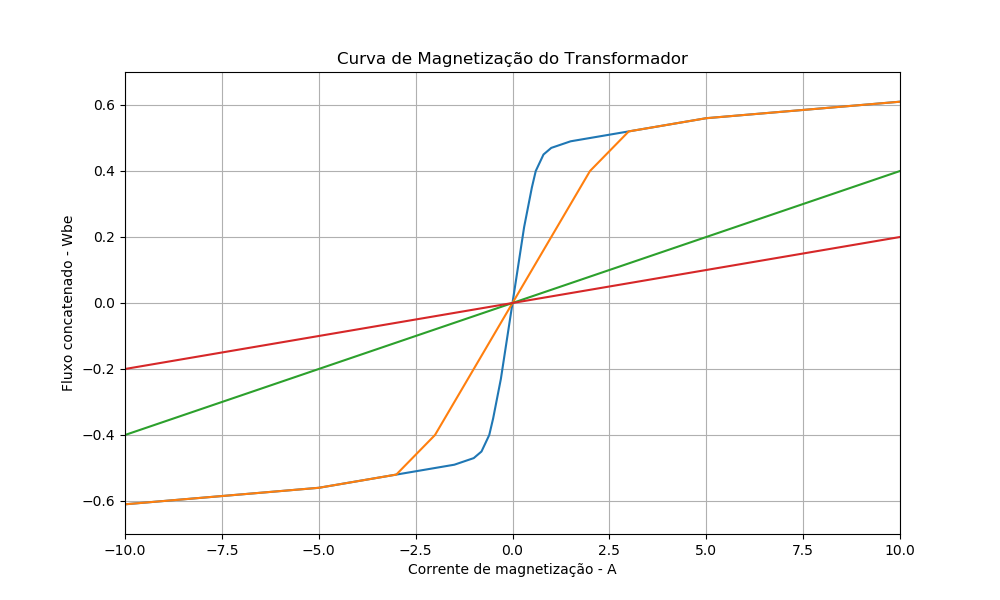

Text(0.5, 0, 'Corrente de magnetização - A')

In [3]:
# Curva de magnetização do Tranformador
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt



# Primeira curva de magnetização
imp = np.array([0,
               0.3,
               0.5,
               0.6,
               0.8,
               0.9,
               1.0,
               1.5,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               20])

lambp = np.array([0,
                 0.23,
                 0.35,
                 0.40,
                 0.45,
                 0.46,
                 0.47,
                 0.49,
                 0.50,
                 0.52,
                 0.54,
                 0.56,
                 0.57,
                 0.58,
                 0.59,
                 0.60,
                 0.61,
                 0.70])


imn = -np.flip(imp)
lambn = -np.flip(lambp)

im = np.concatenate((imn,imp))
lambm = np.concatenate((lambn,lambp))




# Segunda Curva de magnetização

lambp2 = np.array([0,
                 0.06,
                 0.10,
                 0.12,
                 0.16,
                 0.18,
                 0.20,
                 0.30,
                 0.40,
                 0.52,
                 0.54,
                 0.56,
                 0.57,
                 0.58,
                 0.59,
                 0.60,
                 0.61,
                 0.70])

lambn2 = -np.flip(lambp2)
lambm2 = np.concatenate((lambn2,lambp2))



lambm3 = im*0.04 
lambm4 = im*0.02 



# Plotar a curva de magnetização
fig= plt.figure(figsize=(10,6))
plt.plot(im,lambm,im,lambm2,im,lambm3,im,lambm4)
plt.grid()
plt.xlim([-10,10])
plt.ylim([-0.7,0.7])
plt.title('Curva de Magnetização do Transformador')
plt.ylabel('Fluxo concatenado - Wbe')
plt.xlabel('Corrente de magnetização - A')

## Cálculo das correntes de magnetização em função da tensão induzida


Podemos definir a tensão induzida na bobina primária do transformador por:

$e_1(t) = E_1 sin(\omega t)$

onde $\omega$ é a frequência angular e $t$ é o tempo.

Também sabemos que:

$e_1(t) = \frac{d \lambda_1}{dt}(t)$, se a bobina secundária estiver em aberto. 

Logo:

$\lambda_1(t) = \displaystyle\int e_1(t)dt = \int E_1 sin(\omega t)dt = \frac{E_1}{\omega}cos(\omega t)$


Sabendo o fluxo concatenado, e conhecendo a curva de magnetização do circuito, é possível computar a corrente de magnetização. Este procedimento é computado numericamente pela função **correnteMagnetizacao**. Neste caso, uma interpolação é realizada nos dados da curva de magnetização para obter o valor aproximado de corrente para um determinado valor de fluxo concatenado.


A função **serieFourier** é usada para computar a série de Fourier da corrente. Assim podemos verificar o surgimento de componentes harmônicas geradas pela saturação da curva de magnetização.


In [4]:
# Função para calcular a corrente de magnetização

def correnteMagnetizacao(lamb_m,i_m,w_1,E_1,tempo):
    lamb1 = -(E_1/w_1)*np.cos(w_1*tempo)
    im = np.zeros(len(tempo))
    for k in range(len(t)):
        im[k] = np.interp(lamb1[k], lamb_m, i_m)
    return im
    
    
# Função para computar a série de fourier de um sinal
# entrata - vetor do sinbal que será analisado
# tempo - vetor de tempo
# O vetor de entrada tem que ter o mesmo tamanho do vetor de tempo
def serieFourier(entrada,tempo):
    fourier = np.fft.fft(entrada)
    passodeintegracao = tempo[1]-tempo[0]
    frequencias = np.fft.fftfreq(len(entrada), d=passodeintegracao)
    return frequencias, abs(fourier/(len(entrada)/2))


## Animação

O próximo bloco de código produz uma animação que bode ser controlada por um conjunto de botões. Com estes, é possível escolher a amplitude e a frequência da tensão induzida, além da curva de magnetização do núcleo. Automaticamente, a corrente de magnetização e sua série de Fourier são computadas e plotadas. 

<IPython.core.display.Javascript object>


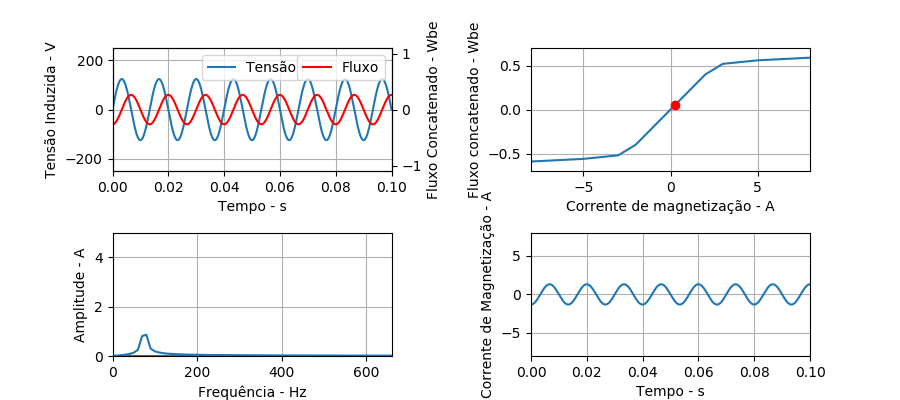

interactive(children=(Dropdown(description='Escolha', options={'Curva Linear 1': 1, 'Curva Linear 2': 4, 'Curv…

In [6]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.animation as animation


w1 = 2*np.pi*60

timestep = 1e-5

t = np.arange(0,0.1,timestep)

freq_inicial,harmonic_inicial = serieFourier(np.sin(w1*t),t)



fig = plt.figure(figsize=(9,4))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)



# Gráficos de tensão e fluxo concatenado
ax_e = fig.add_subplot(2, 2, 1)
line_e, = ax_e.plot(t,  50*np.sin(w1*t))
plt.xlim([0,0.1])
plt.ylim([-250,250])
plt.grid()
plt.ylabel('Tensão Induzida - V')
plt.xlabel('Tempo - s')
ax_lamb = ax_e.twinx()
line_lamb, = ax_lamb.plot(t,  (50/w1)*np.cos(w1*t),'r')
plt.xlim([0,0.1])
plt.ylim([-1.1,1.1])
line_e.set_label('Tensão')
line_lamb.set_label('Fluxo')
ax_e.legend()
ax_lamb.legend()
plt.ylabel('Fluxo Concatenado - Wbe')




ax = fig.add_subplot(2, 2, 2)
line, = ax.plot(im,lambm2)
plt.xlim([-8,8])
plt.ylim([-0.7,0.7])
plt.grid()
plt.ylabel('Fluxo concatenado - Wbe')
plt.xlabel('Corrente de magnetização - A')
line_interativo, = ax.plot(0,0,'ro')
#line_lamb.get_ydata()[0]

ax_harm = fig.add_subplot(2, 2, 3)
line_harm, = ax_harm.plot(freq_inicial,harmonic_inicial)
plt.xlim([0,660])
plt.ylim([0,5])
plt.grid()
plt.ylabel('Amplitude - A')
plt.xlabel('Frequência - Hz')

ax_im = fig.add_subplot(2, 2, 4)
line_im, = ax_im.plot(t,  50*np.sin(w1*t))
plt.xlim([0,0.1])
plt.ylim([-8,8])
plt.grid()
plt.ylabel('Corrente de Magnetização - A')
plt.xlabel('Tempo - s')




def init():  # only required for blitting to give a clean slate.
    line_interativo.set_ydata([np.nan])
    return line_interativo


def animate(i):    
    line_interativo.set_ydata(line_lamb.get_ydata()[15*i])
    line_interativo.set_xdata(line_im.get_ydata()[15*i])
    return line_interativo




def update(Escolha={'Curva Linear 1':1,'Curva Linear 2':4,'Curva Não-Linear 1':2,'Curva Não-Linear 2':3},Ep = (20,220), f = (50,100)):
    if Escolha==1:
        lamb_esc = lambm3
    elif Escolha==2:
        lamb_esc = lambm
    elif Escolha==3:
        lamb_esc = lambm2
    elif Escolha==4:
        lamb_esc = lambm4
    line.set_ydata(lamb_esc)
    line_e.set_ydata(Ep*np.sin(2.*np.pi*f * t))
    line_lamb.set_ydata(-(Ep/(2*np.pi*f))*np.cos(2.*np.pi*f * t))
    im_novo = correnteMagnetizacao(lamb_esc,im,2.*np.pi*f,Ep,t)
    line_im.set_ydata(im_novo)
    freq_im,harmonic_im = serieFourier(im_novo,t)
    line_harm.set_ydata(harmonic_im)
    fig.canvas.draw()


ani = animation.FuncAnimation(
    fig, animate, init_func=init,frames=int(len(line_lamb.get_ydata())/15), interval=1, blit=True, save_count=2)    
display(ani) 
    
e1 = interactive(update)

display(e1)